In [1]:
import glob
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [13]:
server_folder = "/home/golden/kenya_drones/kasanka-bats/annotations"
out_folder = "/home/golden/Dropbox/for-hemal-vtk/demo_datasets/bat_segmentation_2"

In [14]:
train_images = os.path.join(out_folder, 'train', 'images')
os.makedirs(train_images, exist_ok=True)
train_masks = os.path.join(out_folder, 'train', 'masks')
os.makedirs(train_masks, exist_ok=True)
val_images = os.path.join(out_folder, 'val', 'images')
os.makedirs(val_images, exist_ok=True)
val_masks = os.path.join(out_folder, 'val', 'masks')
os.makedirs(val_masks, exist_ok=True)

In [15]:
number_training_examples = 50
number_validation_examples = 10

In [16]:
image_files = sorted(glob.glob(os.path.join(server_folder, 'images/*.jpg')))
print("{} images found.".format(len(image_files)))

4500 images found.


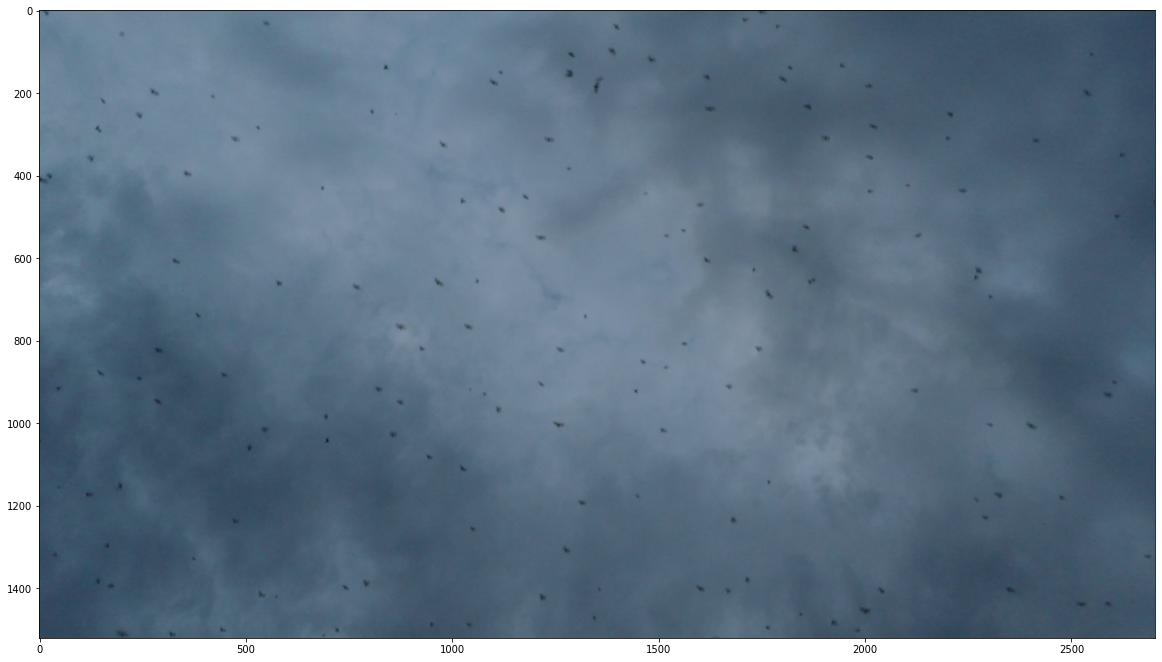

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread(image_files[3800]))

In [26]:
start_ind = 3700 # I know the images around here are pretty clean
# Will just take sucessive annotion samples from server
# (Sucessive annotaions doesn't mean succsive video frames.)
last_ind = (start_ind 
            + number_training_examples
            + number_validation_examples
           )

In [27]:
val_annotations_added = 0
train_annotations_added = 0
val_frequency = number_training_examples // number_validation_examples + 1
for image_ind, image_file in enumerate(image_files[start_ind:last_ind]):
    annotation_type = 'train'
    if image_ind % val_frequency == 0:
        val_annotations_added += 1
        annotation_type = "val"
    else:
        train_annotations_added += 1
    image_name = os.path.basename(image_file).split('.')[0]
    out_mask_folder = os.path.join(out_folder, annotation_type, 'masks')
    mask_file = os.path.join(server_folder, 'masks', image_name + '.png')
    shutil.copy(mask_file, out_mask_folder)
    out_image_folder = os.path.join(out_folder, annotation_type, 'images')
    shutil.copy(image_file, out_image_folder)
print('{} training examples copied. {} val examples added.'.format(train_annotations_added,
                                                                  val_annotations_added))  

50 training examples copied. 10 val examples added.


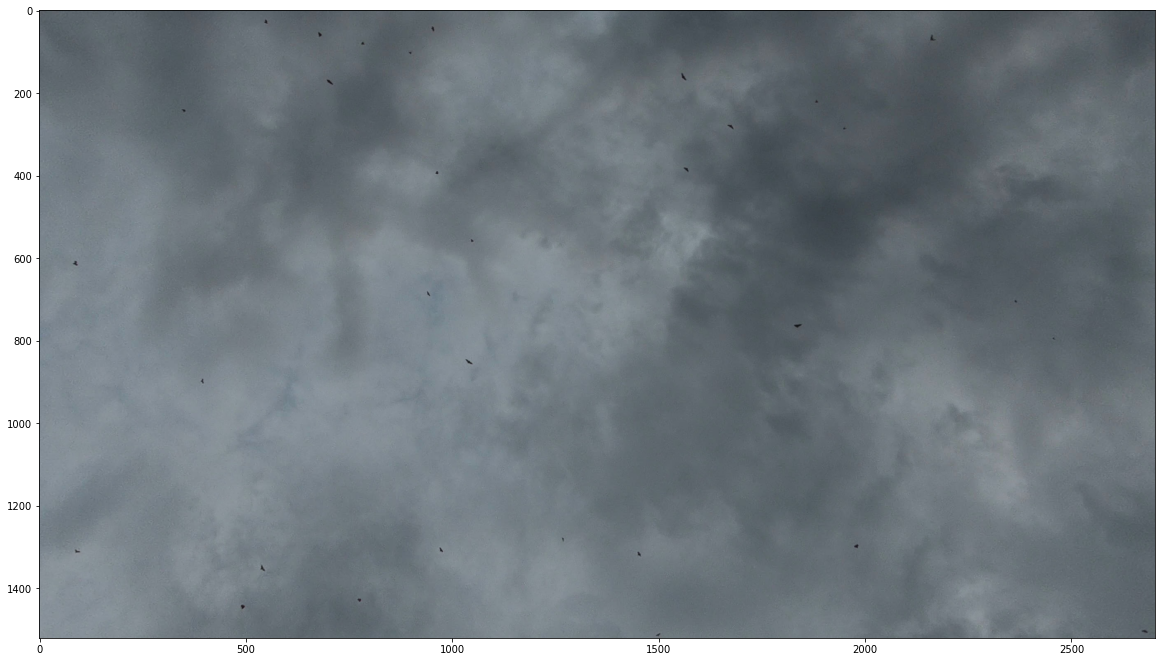

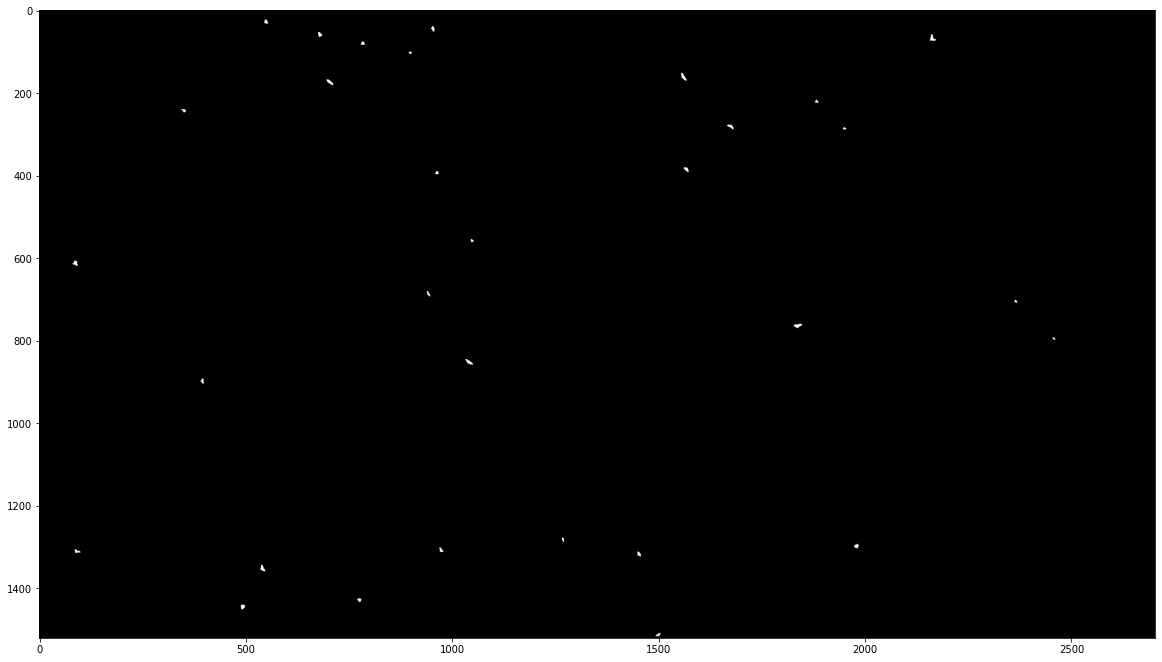

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread(image_file))
plt.figure(figsize=(20,20))
plt.imshow(plt.imread(mask_file))

In [28]:
mean_file = os.path.join(server_folder, 'mean.npy')
std_file = os.path.join(server_folder, 'std.npy')
shutil.copy(mean_file, out_folder)
shutil.copy(std_file, out_folder)

'/home/golden/Dropbox/for-hemal-vtk/demo_datasets/bat_segmentation_2/std.npy'